# Варіант 18

### Хід виконання роботи:

1. Представити початкові дані графічно.
2. Розбити данi на навчальний та валiдацiйний набори.
3. Побудувати на навчальному наборi даних моделi класифiкацiї або регресiї заданi згiдно з варiантом.
4.  Представити моделi графiчно (наприклад вивести частину дерева рiшень, побудувати лiнiю регресiї тощо).
5. Виконати прогнози на основi побудованих моделей.
6. Для кожної з моделей оцiнити, чи має мiсце перенавчання.
7. Розрахувати додатковi результати моделей, наприклад, апостерiорнi iмовiрностi або iншi (згiдно з варiантом).
8. В задачах класифiкацiї побудувати границi рiшень графiчно для кожної з моделей.
9. В задачах регресiї розрахувати для кожної моделi наступнi критерiї якостi, окремо на навчальнiй та валiдацiйнiй множинах:
* коефiцiєнт детермiнацiї $R^2$
* помилки RMSE, MAE та MAPE.
10. Спробувати виконати решiтчастий пошук (grid search) для пiдбору гiперпараметрiв моделей.
11.  Зробити висновки про якiсть роботи моделей на дослiджених даних. На основi критерiїв якостi спробувати обрати найкращу модель.
12. Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки розмiр навчальної множини впливає на якiсть моделi.
13. Варiант мiстить два набори даних. Дослiдити обидва набори за наведеними вище етапами. Для кожного набору спробувати пiдiбрати найкращу модель

### Завдання:

Побудувати моделi регресiї на основi методу опорних векторiв:

* Моделi лiнiйної регресiї на основi класу sklearn.svm.LinearSVR i SVR(kernel="linear"), дослiдити рiзнi значенням параметра epsilon. При використаннi LinearSVR звернути увагу, що навчальнi данi мають бути попередньо масштабованi i центрованi.

* Моделi нелiнiйної регресiї SVR(kernel="poly") з полiномiальним ядром. Розглянути полiноми рiзного ступеня degree та рiзнi комбiнацiї гiперпараметрiв epsilon i C, наприклад: epsilon=0.1 i C=0.01; epsilon=0.1 i C=100.

* Настроїти гiперпараметри epsilon i C.

### Початкові дані:

1. sklearn.datasets.load_boston
2. http://www.kaggle.com/sumanthvrao/daily-climate-time-series-data

In [1]:
# код для центрування графіків
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# 1. Boston data

In [2]:
from sklearn.datasets import load_boston 
import pandas as pd 
import numpy as np
import warnings

# load_boston() має етичну проблему, тому при її запуску
# з'являється попередження. Щоб воно не з'явилось використаємо 
# бібліотеку warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    data = load_boston(return_X_y = False)

print(data["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
labels = data["feature_names"].tolist() + ["MEDV"]
values = np.hstack((data["data"], data["target"][:, np.newaxis]))

data_df = pd.DataFrame(values, columns = labels)
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 1.1 Візуалізація даних

Зобразимо геометричну інтерпретацю ІВР(інтервальний варіацийний ряд) для медіанної ціни для того щоб поглянути на її розподіл.
Кількість інтервалів візьмемо за правилом Стерджеса: $k = 1 + [\log_2 n]$

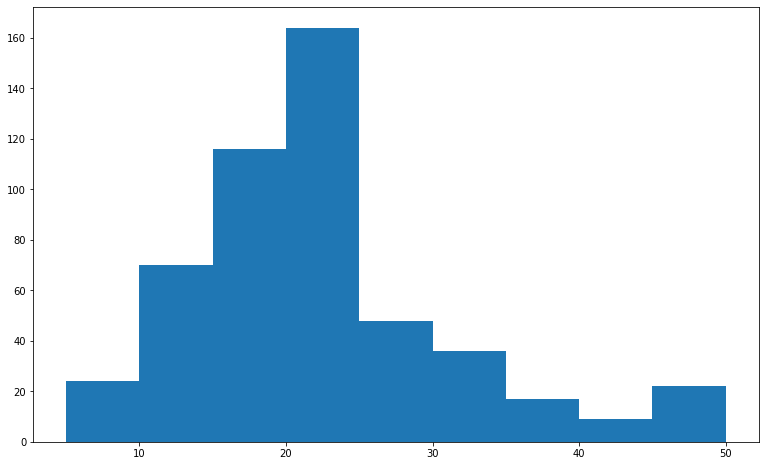

In [5]:
from math import floor
import matplotlib.pyplot as plt

n = data_df.shape[0]
bins = 1 + floor(np.log2(n))
plt.figure(figsize=(13,8));
plt.hist(data_df['MEDV'].values, bins = bins);

Побудуємо ще один графік розподілу, але з більшою кількістю інтервалів

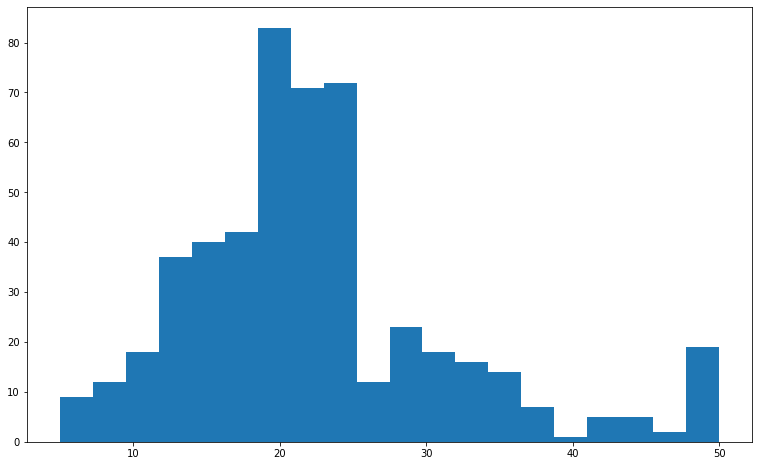

In [6]:
plt.figure(figsize=(13,8));
plt.hist(data_df['MEDV'].values, bins = 20);

Побудуємо heatmap:

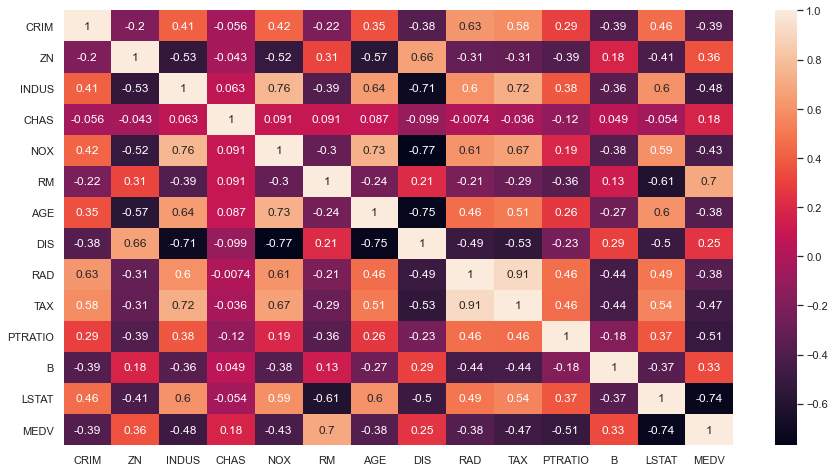

In [7]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("white")
sns.heatmap(data_df.corr(), annot = True);

Як бачимо між деякими нецільовими атрибутами є сильна кореляція(наприклад між DIS та INDUS) 

Для деяких числових атрибутів побудуємо діаграми розмаху

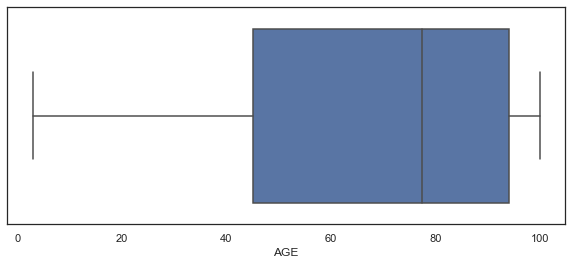

In [8]:
sns.set(rc = {'figure.figsize':(10,4)})
sns.set_style("white")
sns.boxplot(x = data_df["AGE"]);

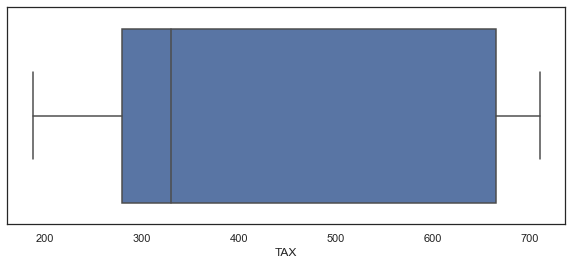

In [9]:
sns.boxplot(x = data_df["TAX"]);

## 1.2 Розбиття на навчальний та валідаційний набори

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# перед розбиттям набору масштабуємо та центруємо дані
# це для коректної роботи моделі sklearn.svm.LinearSVR
scaler = StandardScaler()
X = scaler.fit_transform(data["data"])

X_train, X_val, y_train, y_val = train_test_split(X, data["target"], test_size = 0.2,
                                                  random_state = 42)

## 1.3 Навчання моделей

Згідно з завданням потрібно навчити три моделі, а саме sklearn.svm.LinearSVR, SVR(kernel="linear"), SVR(kernel="poly")

In [11]:
from sklearn.svm import LinearSVR, SVR

linear_svr = LinearSVR()
svr = SVR(kernel="linear")
poly_svr = SVR(kernel="poly")

models = [linear_svr, svr, poly_svr]

for model in models:
    model.fit(X_train, y_train)


## 1.4 Прогнози моделей та метрики

In [12]:
train_pred = []
val_pred = []

for model in models:
    train_pred.append(model.predict(X_train))
    val_pred.append(model.predict(X_val))

In [13]:
from math import ceil
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score



def print_result(models, train_pred, val_pred, y_train, y_val, with_model_names = True):
    
    metrics = [r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error]
    metrics_value = []

    for i in range(len(models)):
        lst_ = []
        for metric in metrics:
            lst_.append(metric(y_train, train_pred[i]))
            lst_.append(metric(y_val, val_pred[i]))
        metrics_value.append(lst_)
    
    for i in range(len(models)):
        if with_model_names:
            n = ceil( (35 - len(str(models[i])))/2 )
            print("="*n + str(models[i]) + "="*n)
        print("         train_set     test_set")
        print("R^2:" + " "*6 + f"{round(metrics_value[i][0],5)}" + " "*7 + f"{round(metrics_value[i][1], 4)}")
        print("MAE:" + " "*6 + f"{round(metrics_value[i][2],5)}" + " "*7 + f"{round(metrics_value[i][3], 4)}")
        print(f"MAPE:" + " "*5 + f"{round(metrics_value[i][4],5)}" + " "*7 + f"{round(metrics_value[i][5], 4)}") 
        len_ = 7 + 7 - len(str(round(np.sqrt(metrics_value[i][4]), 4)))
        print(f"RMSE:"  + " "*5 + f"{round(np.sqrt(metrics_value[i][6]), 4)}" + " "*len_ + f"{round(np.sqrt(metrics_value[i][7]), 4)}")
        print()
        
   
    
print_result(models, train_pred, val_pred, y_train, y_val)

============LinearSVR()============
         train_set     test_set
R^2:      0.70953       0.5891
MAE:      3.11254       3.134
MAPE:     0.14809       0.1645
RMSE:     5.0233        5.4894

========SVR(kernel='linear')========
         train_set     test_set
R^2:      0.71647       0.6059
MAE:      3.10916       3.1019
MAPE:     0.14961       0.1644
RMSE:     4.963        5.3758

=========SVR(kernel='poly')=========
         train_set     test_set
R^2:      0.67407       0.6449
MAE:      3.3275       3.1718
MAPE:     0.14556       0.1646
RMSE:     5.3212        5.1028



Як бачимо значення метрик моделей LinearSVR та SVR(kernel='linear') краще на навчальних наборах, тому в них присутнє перенавчання. У моделі SVR(kernel='poly') значення метрик MAE та RMSE краще на валідаційному наборі, тому тут складно сказати чи є перенавчання.

## 1.5 Налаштування гіперпараметрів моделей

Для налаштування гіперпараметрів будемо використовувати решітчатий пошук. В якості метрики вибору вибираємо RMSE.

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid_for_linear_svr = {"C": [0.1, 0.5, 1, 5, 10, 100],
                             "epsilon": [1e-2, 0.1, 0.5, 1, 5]
                            }
param_grid_for_svr_linear = {"C": [0.1, 0.5, 1, 5, 10, 100],
                             "epsilon": [1e-2, 0.1, 0.5, 1, 5]
                            }
param_grid_for_svr_poly = {"C": [0.1, 0.5, 1, 5, 10, 100],
                           "epsilon": [1e-2, 0.1, 0.5, 1, 5],
                           "degree": [2, 3, 5, 10]
                            }

gs_linear_svr = GridSearchCV(linear_svr, param_grid_for_linear_svr,  cv = 3,
                             scoring = "neg_root_mean_squared_error")

gs_svr_linear = GridSearchCV(svr, param_grid_for_svr_linear,
                             scoring = "neg_root_mean_squared_error")

gs_svr_poly = GridSearchCV(poly_svr, param_grid_for_svr_poly,
                             scoring = "neg_root_mean_squared_error")

In [15]:
# функція сортування словника за значеннями 
# ключа mean_test_score

def dict_sort(dict_, k = -1):
   
    dict_ = {"params": dict_["params"],
             "mean_test_score": k*dict_["mean_test_score"]} 
    
    sorted_dict = {"params" : [],
                   "mean_test_score": []}

    # сортуємо у порядку спадання:
    sorted_score_values = np.sort(dict_["mean_test_score"])


    for value in sorted_score_values:
        index = np.where(dict_["mean_test_score"] == value)[0][0]
        sorted_dict["params"].append(dict_["params"][index])
        sorted_dict["mean_test_score"].append(dict_["mean_test_score"][index])
    
    return sorted_dict
    


# функція для виводу результату решітчатого пошуку
def print_gs_results(results, first = -1, k = -1):
    
    gs_info = {"params": results['params'],
               "mean_test_score":  results['mean_test_score'],
              }
   
    gs_info = dict_sort(gs_info, k)
    size = results["mean_test_score"].shape[0]
    
    for i in range(size):
        str_ = str(gs_info['params'][i])
        n = len(str_)
        spaces = (45 - n)*" "
        print(gs_info['params'][i], spaces,  round(gs_info['mean_test_score'][i],4))
        
        # зупинка виводу, якщо задано параметр first
        if i == first - 1:
            break
            
    

### 1.5.1 Решітчатий пошук для LinearSVR()

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    gs_linear_svr.fit(X_train, y_train)

При запуску цього коду з'являється попередження такого виду:
```
ConvergenceWarning: Liblinear failed to converge, increase the number of iterations. warnings.warn(
```
Оскільки дані - масштабовані та оскільки наш алгоритм не обмежений в кілкості ітерацій, то скоріш за все цей алгоритм - не збіжний на цих даних. Тому надалі його краще не використовувати, бо його передбачення можуть бути поганими.

### 1.5.2 Решітчатий пошук для SVR(kernel = "linear")

In [17]:
gs_svr_linear.fit(X_train, y_train)
print_gs_results(gs_svr_linear.cv_results_, first = 9)

{'C': 10, 'epsilon': 5}                        4.8454
{'C': 100, 'epsilon': 5}                       4.8477
{'C': 5, 'epsilon': 5}                         4.8516
{'C': 1, 'epsilon': 5}                         4.8841
{'C': 0.5, 'epsilon': 5}                       4.9363
{'C': 100, 'epsilon': 0.5}                     5.0566
{'C': 5, 'epsilon': 0.5}                       5.0566
{'C': 10, 'epsilon': 0.5}                      5.0573
{'C': 1, 'epsilon': 0.5}                       5.067


Як бачимо моделі з параметром epsilon рівним 5 дають менше значення метрики RMSE. Але epsilon = 5 є максимальним значенням для epsilon в нашій решітці, тому спробуємо збільшити максимальне значення для цього параметру:

In [18]:
new_param_grid_for_svr_linear = {"C": [0.1, 0.5, 1, 5, 10, 100],
                                 "epsilon": [1e-2, 0.1, 0.5, 1, 5, 10, 15]
                            }
new_gs_svr_linear = GridSearchCV(svr, new_param_grid_for_svr_linear,
                                 scoring = "neg_root_mean_squared_error")

new_gs_svr_linear.fit(X_train, y_train)
print_gs_results(new_gs_svr_linear.cv_results_, first = 9)

{'C': 10, 'epsilon': 5}                        4.8454
{'C': 100, 'epsilon': 5}                       4.8477
{'C': 5, 'epsilon': 5}                         4.8516
{'C': 1, 'epsilon': 5}                         4.8841
{'C': 0.5, 'epsilon': 5}                       4.9363
{'C': 100, 'epsilon': 0.5}                     5.0566
{'C': 5, 'epsilon': 0.5}                       5.0566
{'C': 10, 'epsilon': 0.5}                      5.0573
{'C': 1, 'epsilon': 0.5}                       5.067


Як бачимо модель з параметрами C = 10, epsilon = 5 всеодно дає найменше значення метрики  RMSE. Збережемо найкращу модель для майбутнього вибору фінальної моделі:

In [19]:
best_svr_linear = new_gs_svr_linear.best_estimator_

### 1.5.3  Решітчатий пошук для SVR(kernel = "poly")

In [20]:
gs_svr_poly.fit(X_train, y_train)
print_gs_results(gs_svr_poly.cv_results_, first = 9)

{'C': 10, 'degree': 3, 'epsilon': 0.5}         4.8517
{'C': 10, 'degree': 3, 'epsilon': 1}           4.8823
{'C': 10, 'degree': 3, 'epsilon': 0.1}         4.9192
{'C': 10, 'degree': 3, 'epsilon': 0.01}        4.9424
{'C': 10, 'degree': 3, 'epsilon': 5}           5.0499
{'C': 5, 'degree': 3, 'epsilon': 5}            5.0663
{'C': 5, 'degree': 3, 'epsilon': 0.5}          5.3496
{'C': 5, 'degree': 3, 'epsilon': 1}            5.3534
{'C': 5, 'degree': 3, 'epsilon': 0.1}          5.368


Збережемо найкращу модель:

In [21]:
best_svr_poly = gs_svr_poly.best_estimator_

## 1.6 Вибір фінальної моделі

Отже, вибираємо між двома моделями: SVR(kernel = "linear") та SVR(kernel = "poly"). Навчимо їх на навчальному та валідаційному наборах

In [22]:
best_svr_linear.fit(X_train, y_train)
best_svr_poly.fit(X_train, y_train)

final_train_pred = []
final_val_pred = []
final_models = [best_svr_linear, best_svr_poly]

for model in final_models:
    final_train_pred.append(model.predict(X_train))
    final_val_pred.append(model.predict(X_val))

Порівняємо метрики нових моделей з моделями з стандартними параметрами:

In [23]:
first_models = [svr, poly_svr]
first_train_pred = []
first_val_pred = []

for model in first_models:
    first_train_pred.append(model.predict(X_train))
    first_val_pred.append(model.predict(X_val))

print("моделі з стандартними параметрами:\n")
print_result(first_models, first_train_pred, first_val_pred, y_train, y_val)

print("\n\nмоделі з підігнаними параметрами:\n")
print_result(final_models, final_train_pred, final_val_pred, y_train, y_val)

моделі з стандартними параметрами:

========SVR(kernel='linear')========
         train_set     test_set
R^2:      0.71647       0.6059
MAE:      3.10916       3.1019
MAPE:     0.14961       0.1644
RMSE:     4.963        5.3758

=========SVR(kernel='poly')=========
         train_set     test_set
R^2:      0.67407       0.6449
MAE:      3.3275       3.1718
MAPE:     0.14556       0.1646
RMSE:     5.3212        5.1028



моделі з підігнаними параметрами:

SVR(C=10, epsilon=5, kernel='linear')
         train_set     test_set
R^2:      0.74324       0.6547
MAE:      3.45187       3.3548
MAPE:     0.17447       0.1765
RMSE:     4.7229        5.0318

SVR(C=10, epsilon=0.5, kernel='poly')
         train_set     test_set
R^2:      0.90499       0.7877
MAE:      1.95581       2.5024
MAPE:     0.09517       0.1357
RMSE:     2.873        3.9456



Як бачимо модель SVR(kernel = "poly") після налаштування параметрів також стала перенавченою на навчальному наборі, але навіть при цьому вона дає кращі значення метрик на обох наборах ніж моделі SVR(kernel = "linear"), а також ніж SVR(kernel = "poly") з непідігнаними параметрами.

Отже, в ролі фінальної моделі я вибираю SVR(kernel = "poly") з такими параметрами:

In [24]:
best_svr_poly.get_params()

{'C': 10,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.5,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## 1.7 Навчання фінальної моделi на пiдмножинах навчальних даних

 Виберемо такі розміри підмножин навчального набору: 20%, 40%, 60%, 80%

In [25]:
subsets_of_X_train = []
subsets_of_y_train = []
percentages = [0.2, 0.4, 0.6, 0.8]

for percentage in percentages:
    _, subset_of_X_train, _, subset_of_y_train = train_test_split(X_train, y_train, test_size = percentage,
                                                                  random_state = 42)
    subsets_of_X_train.append(subset_of_X_train)
    subsets_of_y_train.append(subset_of_y_train)

In [26]:
from sklearn.base import clone

final_model = SVR(C=10, epsilon=0.5, kernel='poly', degree = 3)

for i in range(len(subsets_of_X_train)):

    model = clone(final_model)
    model.fit(subsets_of_X_train[i], subsets_of_y_train[i])
    
    train_prediction = model.predict(subsets_of_X_train[i])
    val_prediction = model.predict(X_val)
    
    print(f"{int(percentages[i] * 100)}% від початкового набору:")
    print_result([model], [train_prediction], [val_prediction],subsets_of_y_train[i],
                 y_val, with_model_names = False)

20% від початкового набору:
         train_set     test_set
R^2:      0.83806       0.6952
MAE:      2.11757       3.0136
MAPE:     0.09866       0.1589
RMSE:     3.3933        4.7281

40% від початкового набору:
         train_set     test_set
R^2:      0.83296       0.7879
MAE:      2.27577       2.6169
MAPE:     0.1046       0.1427
RMSE:     3.7618        3.9438

60% від початкового набору:
         train_set     test_set
R^2:      0.87643       0.8115
MAE:      1.99794       2.34
MAPE:     0.09353       0.1213
RMSE:     3.2638        3.7182

80% від початкового набору:
         train_set     test_set
R^2:      0.90783       0.7965
MAE:      1.89108       2.529
MAPE:     0.08918       0.1347
RMSE:     2.9049        3.8633



Як бачимо найкращі метрики на тесовому наборі модель дає, коли навчається на 60% від навчального набору. Скоріш за все це тому що при більшому наборі навчальних даних модель починає перенавчатися на ньому і через це починає погано узагальнюватися. 

# 2. Daily Climate time series data
Задача - передбачити погодні умови за допомогою моделей опорних векторів, використовуючи дані часового ряду.
Будемо передбачати кожну змінну окремо.

In [27]:
train_set = pd.read_csv("DailyDelhiClimateTrain.csv")
test_set = pd.read_csv("DailyDelhiClimateTest.csv")

In [28]:
train_set.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [29]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [30]:
train_set.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


Перетворимо тип колонки date в datetime а також зробимо її індексом

In [31]:
train_set['date'] = pd.to_datetime(train_set['date'], format='%Y/%m/%d')
train_set = train_set.set_index('date')

## 2.1 Візуалізація даних

Зобразимо часовий ряд для атрибуту meantemp(середня температура)

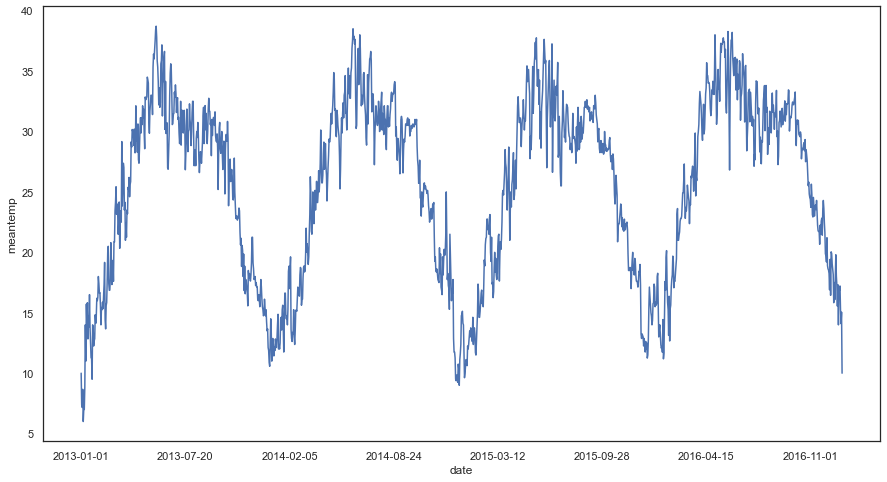

In [32]:
x_ticks = train_set.index.tolist()[::200]

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("white")
plot = sns.lineplot(x = train_set.index, y = train_set["meantemp"])
plot.set_xticks(x_ticks);

На графіку видно чотири "горби" та три "впадини" середньої температури, дивлячись на дати зрозуміло, що це відповідно літа та зими. 

Зобразимо часовий ряд для атрибуту humidity(вологість)

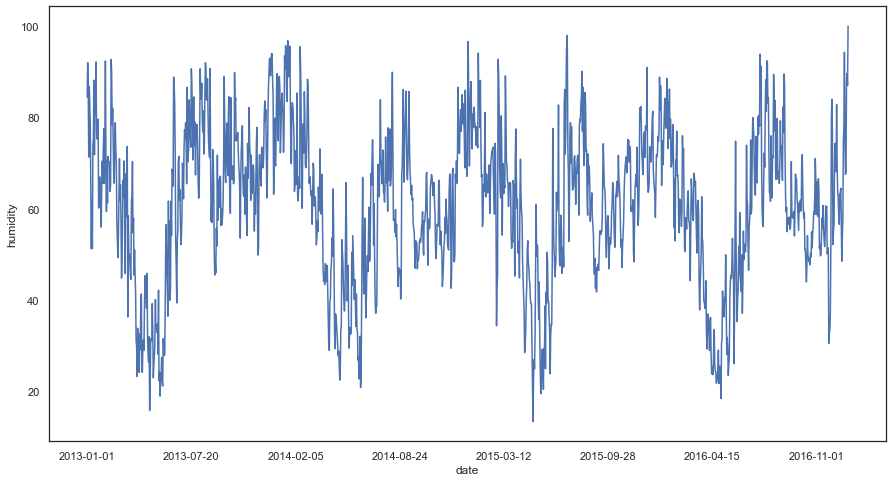

In [33]:
plot = sns.lineplot(x = train_set.index, y = train_set["humidity"])
plot.set_xticks(x_ticks);

Зобразимо часовий ряд для атрибуту wind_speed

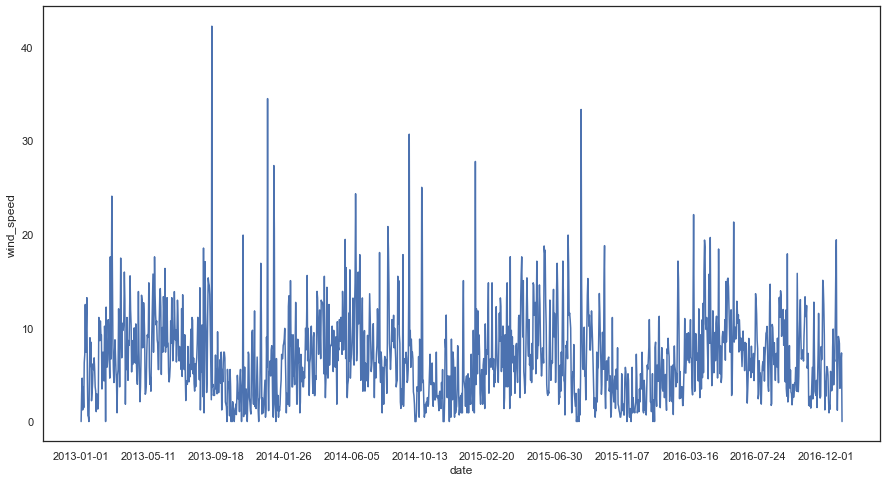

In [34]:
x_ticks = train_set.index.tolist()[::130]

plot = sns.lineplot(x = train_set.index, y = train_set["wind_speed"])
plot.set_xticks(x_ticks);

Видно, що зимою швидкість вітру досягає мінімуму, тоді починає зростати і приблизно в травні-червні досягає максимуму, а потім знову спадає до зими. Також в наборі присутні дні з аномально високими швидкостями вітру. Побудуємо ще діаграму розмаху для цього параметру  

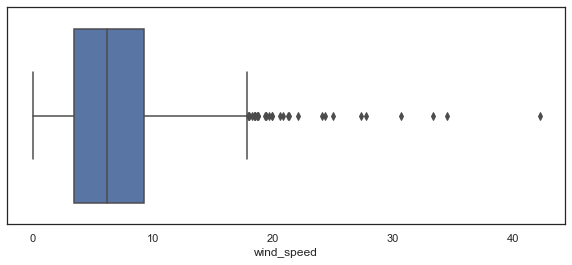

In [35]:
sns.set(rc = {'figure.figsize':(10,4)})
sns.set_style("white")
sns.boxplot(x = train_set["wind_speed"]);

В атрибуті wind_speed присутні викиди, які можуть не дати моделі нормально узагальнюватись. Спробуємо їх видалити за допомогою бібліотеки hampel

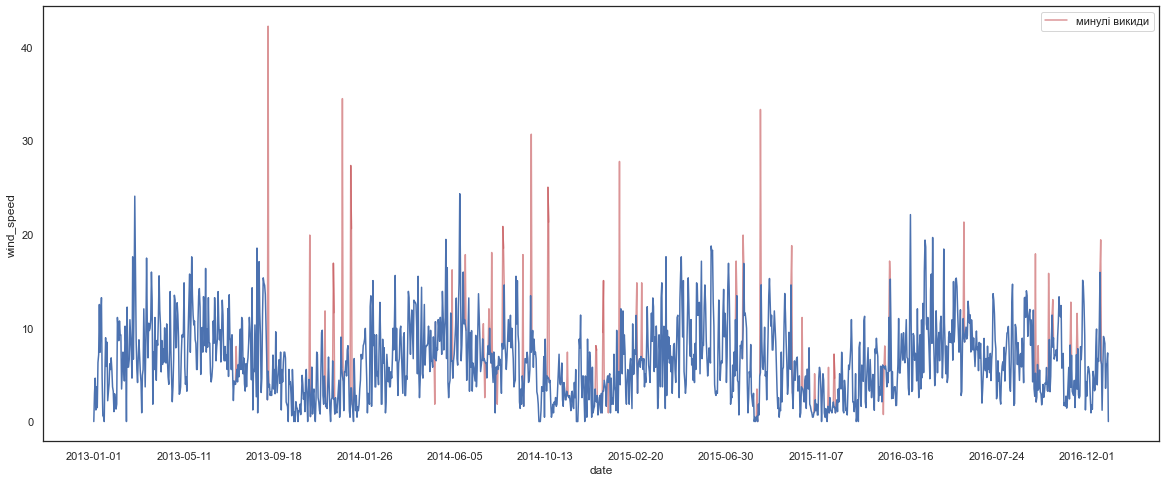

In [36]:
from hampel import hampel

outliers_indices =  hampel(train_set["wind_speed"], window_size=5, n=3)
anomaly_data = train_set["wind_speed"].iloc[outliers_indices]
normal_data = train_set["wind_speed"].to_numpy()

changed = hampel(train_set["wind_speed"], window_size=5, n=3, imputation=True)

# координати для ліній викидів
X = []
Y = []
for idx in outliers_indices:
    Y.append([normal_data[idx-1], normal_data[idx], normal_data[idx+1]])
    X.append([train_set.index[idx-1], train_set.index[idx], train_set.index[idx+1]])

sns.set(rc = {'figure.figsize':(20,8)})
sns.set_style("white")

for i in range(len(X)):
    
    x, y = X[i], Y[i]
        
    # коли малюємо останній графік додаємо підпис    
    label = ""
    if i == len(X) - 2:
        label = "минулі викиди"

    plot = sns.lineplot(x = X[i], y = Y[i], color = "r", alpha = 0.6, label = label)

plot = sns.lineplot(x = changed.index, y = changed)
plot.set_xticks(x_ticks);

Тепер модель має краще узагальнюватись на навчальних даних

In [37]:
# змінимо атрибут wind_speed в навчальному наборі
# на той в якому немає викидів
train_set["wind_speed"] = changed

Зобразимо часовий ряд для атрибуту meanpressure(середній тиск)

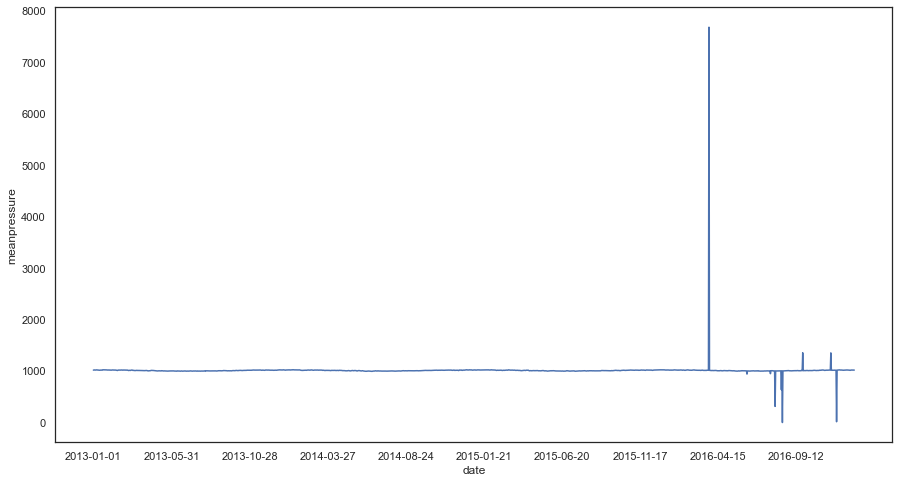

In [38]:
x_ticks = train_set.index.tolist()[::150]
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("white")

plot = sns.lineplot(x = train_set.index, y = train_set["meanpressure"])
plot.set_xticks(x_ticks);

Як бачимо тут також наявні аномальні значення(наприклад, тиск в 8000 одиниць), змінимо їх за допомогою hampel

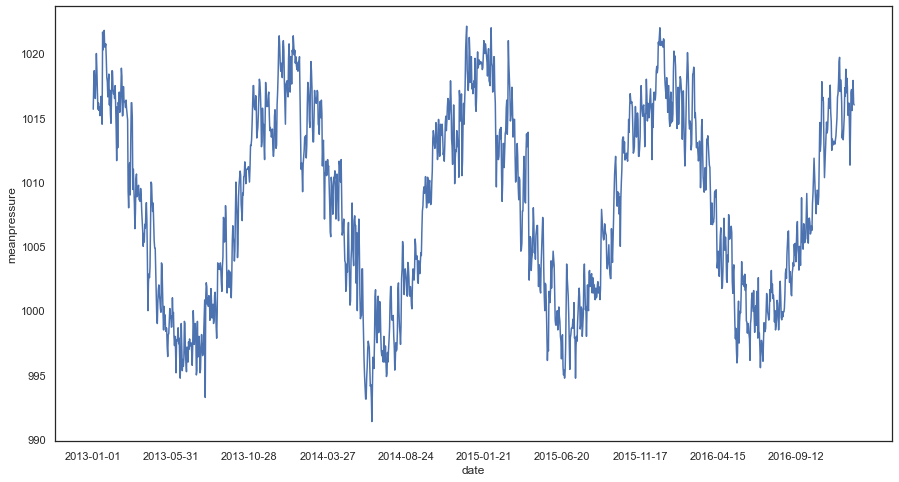

In [39]:
changed = hampel(train_set["meanpressure"], window_size=5, n=3, imputation=True)

# змінюємо атрибут meanpressure в початковому наборі:
train_set["meanpressure"] = changed

plot = sns.lineplot(x = changed.index, y = changed)
plot.set_xticks(x_ticks);

Тепер видно, що середній тиск також змінюється з порою року. Він досягає максимуму  в січні а мінімуму в травні-червні. Схожі діапазони були і для швидкості вітру, побудуємо scatter_matrix, щоб побачити залежність між атрибутами:

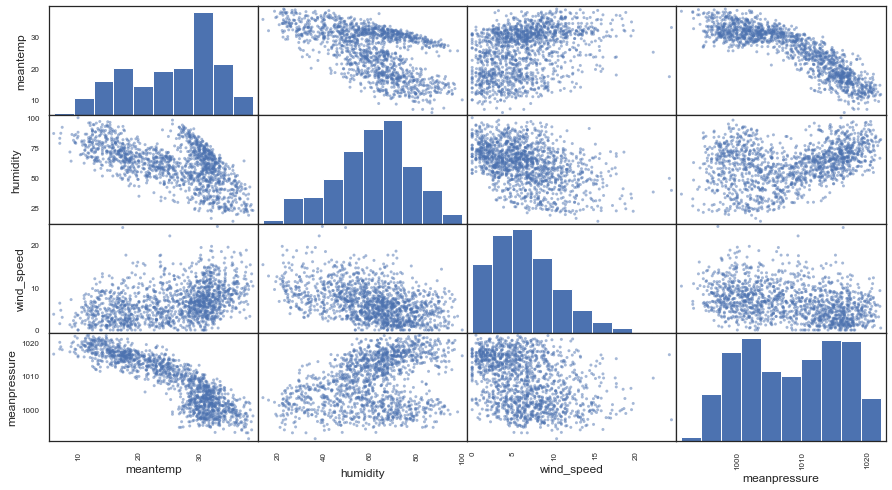

In [40]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_set);

Між meanpressure та wind_speed ніякої залежності не прослідковується, а от між meanpressure та meantemp є сильна лінійна залежність. Побудуємо на кінець кореляційну матрицю:

In [41]:
train_set.corr()

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.571951,0.375312,-0.880039
humidity,-0.571951,1.000000,-0.440980,0.327804
wind_speed,0.375312,-0.440980,1.000000,-0.357461
meanpressure,-0.880039,0.327804,-0.357461,1.000000


## 2.2 Розбиття на навчальний та валідаційний набори

Я буду перебачати середні погодні умови на місяць. Тому переробимо наші данні, щоб в наборі мітилась середнє значення показника на місяць

In [42]:
#data = train_set.asfreq('MS')

# не будемо використовувати значення з першого дня 2017 року
years = [2013, 2014, 2015, 2016]
indexes = []
mean_values = {"meantemp":[], "humidity":[],
               "wind_speed":[], "meanpressure":[]
              }


for year in years:
    
    for month in range(1, 13):
              
        df = train_set.where(np.full((4, 1462), (train_set.index.year == year) & (train_set.index.month == month) ).T)
        df.dropna(inplace = True)
        
        mean_values["meantemp"].append(df.mean()["meantemp"])
        mean_values["humidity"].append(df.mean()["humidity"])
        mean_values["wind_speed"].append(df.mean()["wind_speed"])
        mean_values["meanpressure"].append(df.mean()["meanpressure"])
        
        indexes.append(df.index[0])
        
train_set_mean = pd.DataFrame(mean_values, index = indexes)

Для кожного цільового значення зробимо окремі навчальні та валідаційні набори, які будуть зберігатись в словнику train_val_sets. Запишемо перші 35 місяців в тренувальний набір, а інші 13 в валідаційний

In [43]:
train_val_sets = {"meantemp": None, "humidity": None ,
                  "wind_speed": None, "meanpressure": None
                 }
attribs = ["meantemp", "humidity", "wind_speed", "meanpressure"]

for attrib in attribs:
    
    train_val_sets[attrib] = {}
    train_val_sets[attrib]["train"] = train_set_mean[attrib].iloc[:35]
    train_val_sets[attrib]["val"] = train_set_mean[attrib].iloc[35:]
    
    # налаштовуємо частоту, без неї моделі би навчались з попередженням
    train_val_sets[attrib]["train"] = train_val_sets[attrib]["train"].asfreq("MS")
    train_val_sets[attrib]["val"] = train_val_sets[attrib]["val"].asfreq("MS")
    

## 2.3 Навчання моделей

Для того щоб використовувати LinearSVR дані міють бути масштабовані, але оскільки це часовий ряд, то модель має робити прогноз і на його основі робити інший прогноз, тому дані не можливо масштабувати. Церез це я не буду використовувати модель на цьому датасеті. Будемо навчати моделі SVR(kernel = "linear") та SVR(kernel = "poly") за допомогою класу ForecasterAutoreg з бібліотеки skforecast. Навчені моделі будемо зберігати в словнику fitted_models

In [44]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg

model_keys = ["linear", "poly"]
fitted_models = {"meantemp":{}, "humidity":{},
               "wind_speed":{}, "meanpressure":{}
              }

for attrib in attribs:
    
    linear = ForecasterAutoreg( regressor = SVR(kernel = "linear"), lags = 6)
    poly = ForecasterAutoreg( regressor = SVR(kernel = "poly"), lags = 6)

    linear.fit(train_val_sets[attrib]["train"])
    poly.fit(train_val_sets[attrib]["train"])
    
    fitted_models[attrib]["linear"] = linear
    fitted_models[attrib]["poly"] = poly
    


## 2.4 Прогнози моделей та метрики

Прогнози моделей будемо зберігати в словнику predictions

In [45]:
predictions = {"meantemp":{}, "humidity":{},
               "wind_speed":{}, "meanpressure":{}
              }

for attrib in attribs:
    
    prediction = fitted_models[attrib]["linear"].predict(steps = 13)
    predictions[attrib]["linear"] = prediction
    
    try:
        prediction = fitted_models[attrib]["poly"].predict(steps = 13)
        predictions[attrib]["poly"] = prediction
    except ValueError:
        pass
    

Розглянемо детальніше прогнози цільового значення meanpressure від моделі SVR(kernel = "poly") 

In [46]:
fitted_models["meanpressure"]["poly"].predict(steps = 5)

2015-12-01     4.386178e+05
2016-01-01    -3.761200e+15
2016-02-01     2.355410e+45
2016-03-01   -5.784784e+134
2016-04-01              NaN
Freq: MS, Name: pred, dtype: float64

З невідомої мені причини ця модель не може нормально прогнозувати значення meanpressure, тому для прогнозування цього значення її використовувати не можна. Тепер створимо аналог функції print_result  з попереднього пункту, щоб вивести метрики моделей

In [47]:
def print_result_2(predictions, train_val_sets, attribs = ["meantemp", "humidity", "wind_speed", "meanpressure"],
                   with_attrib_name = True):

    models_names = ["linear", "poly"]
    metrics = [r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error]
    metrics_value = {"meantemp":{}, "humidity":{},
               "wind_speed":{}, "meanpressure":{}
              }
    
    # тут я заповнюю словник metrics_value значеннями метрик 
    for attrib in attribs: 
        
        for model_name in models_names:
            # робимо це бо прогнозів від SVR(kernel = "poly") для
            # meanpressure - нема
            
            if attrib == "meanpressure" and model_name == "poly":
                break
              
            y_val = train_val_sets[attrib]["val"]
            y_pred = predictions[attrib][model_name]
            
            lst_ = []
            for metric in metrics:
                lst_.append(metric(y_val.to_numpy(), y_pred.to_numpy()))
             
            metrics_value[attrib][model_name] = lst_.copy()
           
    # тут я виводжу результати
    for attrib in attribs:        
        
        if with_attrib_name:
            print(attrib + ":")
        if attrib == "meanpressure":
            
            linear_metr = metrics_value[attrib]["linear"]
 
            # список len_ буде містити кількість пропусків, які треба зробити 
            # після виведення значення метрики(зроблено, щоб все гарніше виводилось)
            len_ = []
            for i in range(4):
                len_.append(7 + 7 - len(str(round(linear_metr[0],5))))
            
            print("           linear      poly")
            print("R^2:" + " "*6 + f"{round(linear_metr[0],5)}" + " "*len_[0] + "--")
            print("MAE:" + " "*6 + f"{round(linear_metr[1],5)}" + " "*len_[1] + "--")
            print(f"MAPE:" + " "*5 + f"{round(linear_metr[2],5)}" + " "*len_[2] + "--") 
            print(f"RMSE:"  + " "*5 + f"{round(np.sqrt(linear_metr[3]), 4)}" + " "*len_[3] + "--")
            print()
            
            
        else:
            
            linear_metr = metrics_value[attrib]["linear"]
            poly_metr = metrics_value[attrib]["poly"]
            
            len_ = []
            for i in range(4):
                len_.append(5 + 7 - len(str(round(linear_metr[0],5))))
            
            print("           linear      poly")
            print("R^2:" + " "*6 + f"{round(linear_metr[0],5)}" + " "*len_[0] + f"{round(poly_metr[0], 4)}")
            print("MAE:" + " "*6 + f"{round(linear_metr[1],5)}" + " "*len_[1] + f"{round(poly_metr[1], 4)}")
            print(f"MAPE:" + " "*5 + f"{round(linear_metr[2],5)}" + " "*len_[2] + f"{round(poly_metr[2], 4)}") 
            print(f"RMSE:"  + " "*5 + f"{round(np.sqrt(linear_metr[3]), 5)}" + " "*len_[3] + f"{round(np.sqrt(poly_metr[3]), 4)}")
            print()
        
        
    
        

In [48]:
print_result_2(predictions, train_val_sets)

meantemp:
           linear      poly
R^2:      0.74228     0.8702
MAE:      2.94364     1.8225
MAPE:     0.1126     0.0688
RMSE:     3.60086     2.5554

humidity:
           linear      poly
R^2:      -0.11501    0.0299
MAE:      11.33144    11.006
MAPE:     0.24997    0.2181
RMSE:     14.57959    13.5993

wind_speed:
           linear      poly
R^2:      0.37769     0.3826
MAE:      1.16663     1.1711
MAPE:     0.19086     0.2019
RMSE:     1.40198     1.3965

meanpressure:
           linear      poly
R^2:      0.97041       --
MAE:      0.90649       --
MAPE:     0.0009       --
RMSE:     1.1625       --



Також зобразимо результат для кожного цільового значення графічно:

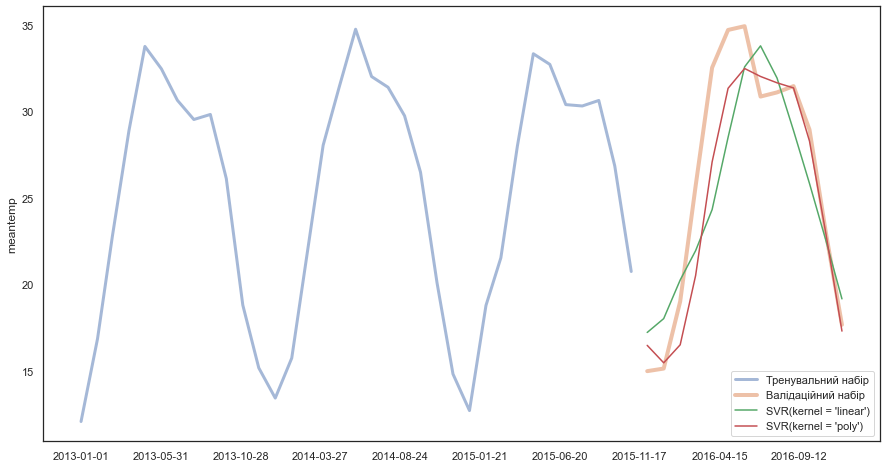

In [49]:
data_train = train_val_sets["meantemp"]["train"]
data_val  = train_val_sets["meantemp"]["val"]
linear_pred = predictions["meantemp"]["linear"]
poly_pred = predictions["meantemp"]["poly"]

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("white")

plot = sns.lineplot(x = data_train.index,  y = data_train,  legend='brief', label= "Тренувальний набір", linewidth = 3, alpha = 0.5)
plot = sns.lineplot(x = data_val.index,    y = data_val,    legend='brief', label= "Валідаційний набір", linewidth = 4, alpha = 0.5)
plot = sns.lineplot(x = linear_pred.index, y = linear_pred, legend='brief', label= "SVR(kernel = 'linear')", linewidth = 1.5)
plot = sns.lineplot(x = poly_pred.index,   y = poly_pred,   legend='brief', label= "SVR(kernel = 'poly')", linewidth = 1.5)


plot.set_xticks(x_ticks);

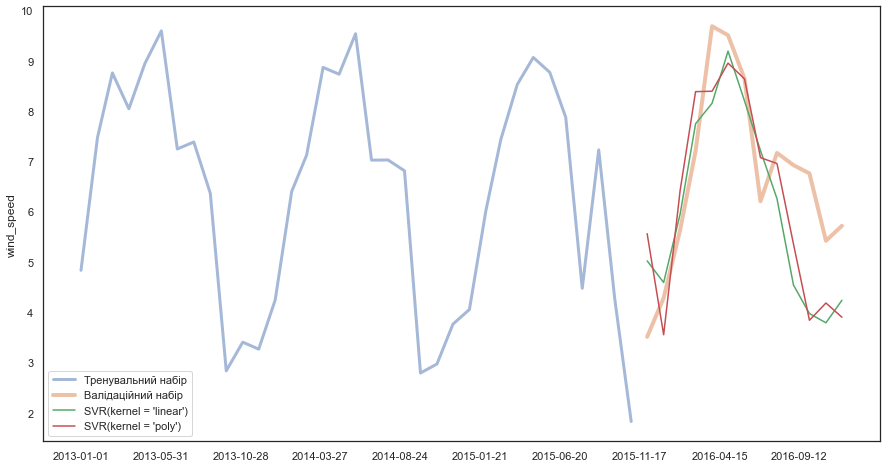

In [50]:
data_train = train_val_sets["wind_speed"]["train"]
data_val  = train_val_sets["wind_speed"]["val"]
linear_pred = predictions["wind_speed"]["linear"]
poly_pred = predictions["wind_speed"]["poly"]

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("white")

plot = sns.lineplot(x = data_train.index,  y = data_train,  legend='brief', label= "Тренувальний набір", linewidth = 3, alpha = 0.5)
plot = sns.lineplot(x = data_val.index,    y = data_val,    legend='brief', label= "Валідаційний набір", linewidth = 4, alpha = 0.5)
plot = sns.lineplot(x = linear_pred.index, y = linear_pred, legend='brief', label= "SVR(kernel = 'linear')", linewidth = 1.5)
plot = sns.lineplot(x = poly_pred.index,   y = poly_pred,   legend='brief', label= "SVR(kernel = 'poly')", linewidth = 1.5)


plot.set_xticks(x_ticks);

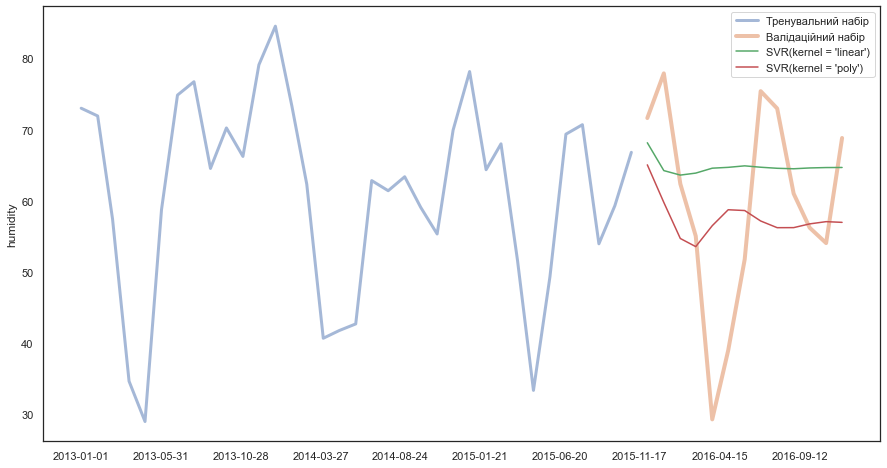

In [51]:
data_train = train_val_sets["humidity"]["train"]
data_val  = train_val_sets["humidity"]["val"]
linear_pred = predictions["humidity"]["linear"]
poly_pred = predictions["humidity"]["poly"]

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("white")

plot = sns.lineplot(x = data_train.index,  y = data_train,  legend='brief', label= "Тренувальний набір", linewidth = 3, alpha = 0.5)
plot = sns.lineplot(x = data_val.index,    y = data_val,    legend='brief', label= "Валідаційний набір", linewidth = 4, alpha = 0.5)
plot = sns.lineplot(x = linear_pred.index, y = linear_pred, legend='brief', label= "SVR(kernel = 'linear')", linewidth = 1.5)
plot = sns.lineplot(x = poly_pred.index,   y = poly_pred,   legend='brief', label= "SVR(kernel = 'poly')", linewidth = 1.5)


plot.set_xticks(x_ticks);

По метрикам було також видно, що моделі найгірше передбачають саме цей параметр.

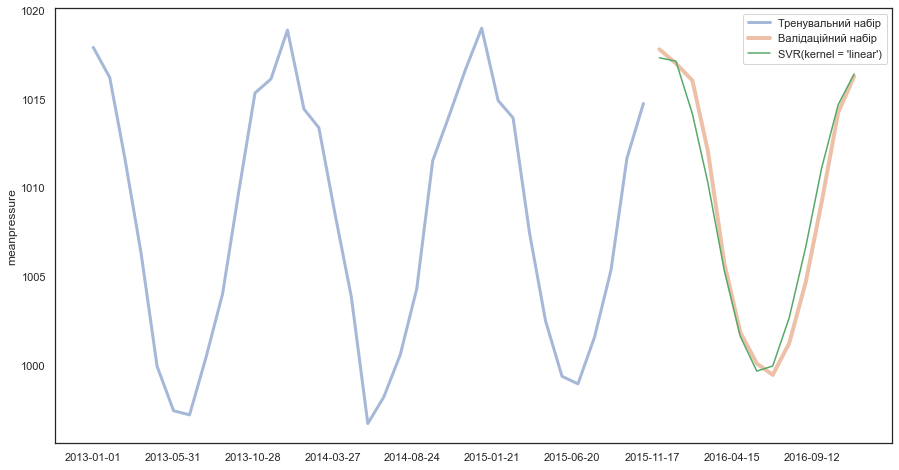

In [52]:
data_train = train_val_sets["meanpressure"]["train"]
data_val  = train_val_sets["meanpressure"]["val"]
linear_pred = predictions["meanpressure"]["linear"]

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("white")

plot = sns.lineplot(x = data_train.index,  y = data_train,  legend='brief', label= "Тренувальний набір", linewidth = 3, alpha = 0.5)
plot = sns.lineplot(x = data_val.index,    y = data_val,    legend='brief', label= "Валідаційний набір", linewidth = 4, alpha = 0.5)
plot = sns.lineplot(x = linear_pred.index, y = linear_pred, legend='brief', label= "SVR(kernel = 'linear')", linewidth = 1.5)


plot.set_xticks(x_ticks);

## 2.5 Налаштування гіперпараметрів моделей.

Налаштовувати параметри будемо за допомогою функції grid_search_forecaster біліотеки skforekaster. Для визначення найкращої моделі будемо використовувати метрику MSE

In [53]:
from skforecast.model_selection import grid_search_forecaster

linear_param_grid = {"C": [0.1, 0.5, 1, 5, 10, 100],
                     "epsilon": [1e-2, 0.1, 0.5, 1, 5, 10, 15]
                            }

poly_param_grid =  {"C": [0.1, 0.5, 1, 5, 10, 100],
                    "epsilon": [1e-2, 0.1, 0.5, 1, 5],
                    "degree": [2, 3, 5]
                            }


### 2.5.1  Решітчатий пошук для SVR(kernel = "linear")

In [54]:
linear_gs_res = {}

lags_grid = [6, 12]
for attrib in attribs:
    
    data = train_val_sets[attrib]["train"]
    linear_gs_res[attrib] = grid_search_forecaster(
                        forecaster         = fitted_models[attrib]["linear"],
                        y                  = data,
                        lags_grid          = lags_grid,
                        param_grid         = linear_param_grid,
                        steps              = 13,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data)*0.7),
               )
    
    # результат зберігається у вигляді датафрейму
    # перетворимо його в словник з ключами: params та mean_squared_error
    temp = {}
    temp[attrib] = linear_gs_res[attrib][["params", "mean_squared_error"]] 
    temp[attrib].rename(columns = {"mean_squared_error":"mean_test_score"}, inplace = True)
    linear_gs_res[attrib] = {}
    
    linear_gs_res[attrib]["params"] = temp[attrib]["params"].to_list()
    linear_gs_res[attrib]["mean_test_score"] = np.array(temp[attrib]["mean_test_score"].to_list())
    

    

Number of models compared: 84.


loop param_grid:  21%|███████▉                             | 9/42 [00:00<00:00, 81.70it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  62%|██████████████████████▎             | 26/42 [00:00<00:00, 74.90it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  81%|█████████████████████████████▏      | 34/42 [00:00<00:00, 74.85it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop lags_grid:  50%|███████████████████▌                   | 1/2 [00:00<00:00,  1.46it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:   0%|                                             | 0/42 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  21%|███████▉                             | 9/42 [00:00<00:00, 81.07it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  43%|███████████████▍                    | 18/42 [00:00<00:00, 78.98it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop param_grid:  62%|██████████████████████▎             | 26/42 [00:00<00:00, 76.80it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  81%|█████████████████████████████▏      | 34/42 [00:00<00:00, 77.41it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:01<00:00,  1.61it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)




C:\Users\Yana\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'C': 0.1, 'epsilon': 0.01}
  Backtesting metric: 3.4524348746138482

Number of models compared: 84.


loop param_grid:   0%|                                             | 0/42 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process


loop param_grid:  19%|███████                              | 8/42 [00:00<00:00, 78.42it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop param_grid:  38%|█████████████▋                      | 16/42 [00:00<00:00, 77.98it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  57%|████████████████████▌               | 24/42 [00:00<00:00, 68.95it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  76%|███████████████████████████▍        | 32/42 [00:00<00:00, 60.87it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  93%|█████████████████████████████████▍  | 39/42 [00:01<00:00, 22.95it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)




loop lags_grid:  50%|███████████████████▌                   | 1/2 [00:01<00:01,  1.30s/it]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)




loop param_grid:  19%|███████                              | 8/42 [00:00<00:00, 79.20it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  57%|████████████████████▌               | 24/42 [00:00<00:00, 79.56it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  98%|███████████████████████████████████▏| 41/42 [00:00<00:00, 79.81it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:01<00:00,  1.08it/s]
C:\Users\Yana\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6] 
  Parameters: {'C': 0.5, 'epsilon': 0.5}
  Backtesting metric: 92.1388554806269

Number of models compared: 84.


loop param_grid:  24%|████████▌                           | 10/42 [00:00<00:00, 90.09it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  48%|█████████████████▏                  | 20/42 [00:00<00:00, 81.06it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  69%|████████████████████████▊           | 29/42 [00:00<00:00, 79.83it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)




loop param_grid:  90%|████████████████████████████████▌   | 38/42 [00:00<00:00, 72.65it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  21%|███████▉                             | 9/42 [00:00<00:00, 83.70it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  64%|███████████████████████▏            | 27/42 [00:00<00:00, 85.17it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:01<00:00,  1.82it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


C:\Users\Yana\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(



Number of models compared: 84.


loop param_grid:  19%|███████                              | 8/42 [00:00<00:00, 74.76it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  57%|████████████████████▌               | 24/42 [00:00<00:00, 76.96it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  95%|██████████████████████████████████▎ | 40/42 [00:00<00:00, 75.88it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:   0%|                                             | 0/42 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)




loop param_grid:  21%|███████▉                             | 9/42 [00:00<00:00, 87.37it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  64%|███████████████████████▏            | 27/42 [00:00<00:00, 82.44it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:01<00:00,  1.84it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


C:\Users\Yana\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Тепер виведемо результати для перших 9 найкращих параметрів

In [55]:
print_gs_results(linear_gs_res["meantemp"], k = 1, first = 9)

{'C': 0.1, 'epsilon': 0.01}                    3.4524
{'C': 0.1, 'epsilon': 0.1}                     3.6313
{'C': 0.5, 'epsilon': 0.01}                    4.3162
{'C': 0.5, 'epsilon': 0.1}                     4.3567
{'C': 0.1, 'epsilon': 0.5}                     4.4184
{'C': 100, 'epsilon': 1}                       5.0665
{'C': 100, 'epsilon': 1}                       5.0665
{'C': 100, 'epsilon': 1}                       5.0665
{'C': 100, 'epsilon': 1}                       5.0665


In [56]:
print_gs_results(linear_gs_res["wind_speed"], k = 1, first = 9)

{'C': 0.1, 'epsilon': 0.1}                     0.9033
{'C': 0.1, 'epsilon': 0.01}                    0.9453
{'C': 0.1, 'epsilon': 0.5}                     0.9651
{'C': 0.5, 'epsilon': 0.5}                     1.0115
{'C': 0.5, 'epsilon': 0.5}                     1.0115
{'C': 0.5, 'epsilon': 0.5}                     1.0115
{'C': 0.5, 'epsilon': 0.5}                     1.0115
{'C': 0.5, 'epsilon': 0.5}                     1.0115
{'C': 0.5, 'epsilon': 0.01}                    1.1149


In [57]:
print_gs_results(linear_gs_res["humidity"], k = 1, first = 9)

{'C': 0.5, 'epsilon': 0.5}                     92.1389
{'C': 1, 'epsilon': 0.5}                       92.1441
{'C': 5, 'epsilon': 0.5}                       92.1577
{'C': 10, 'epsilon': 0.5}                      92.185
{'C': 0.5, 'epsilon': 0.1}                     92.5528
{'C': 1, 'epsilon': 0.1}                       92.5553
{'C': 5, 'epsilon': 0.1}                       92.5743
{'C': 10, 'epsilon': 0.1}                      92.6091
{'C': 100, 'epsilon': 0.5}                     92.6855


In [58]:
print_gs_results(linear_gs_res["meanpressure"], k = 1, first = 9)

{'C': 0.1, 'epsilon': 1}                       1.3439
{'C': 0.1, 'epsilon': 0.5}                     1.5057
{'C': 0.5, 'epsilon': 0.01}                    1.9921
{'C': 0.5, 'epsilon': 0.1}                     2.1242
{'C': 0.1, 'epsilon': 0.01}                    2.5223
{'C': 1, 'epsilon': 0.01}                      2.5394
{'C': 1, 'epsilon': 0.1}                       2.5584
{'C': 0.1, 'epsilon': 0.1}                     2.5634
{'C': 1, 'epsilon': 1}                         2.5831


### 2.5.2 Решітчатий пошук для SVR(kernel = "poly")

In [59]:
poly_gs_res = {}

lags_grid = [6, 12]

for attrib in ["meantemp", "humidity", "wind_speed"]:
    
    data = train_val_sets[attrib]["train"]
    poly_gs_res[attrib] = grid_search_forecaster(
                        forecaster         = fitted_models[attrib]["poly"],
                        y                  = data,
                        lags_grid          = lags_grid,
                        param_grid         = poly_param_grid,
                        steps              = 13,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data)*0.7),
               )
    
    # результат зберігається у вигляді датафрейму
    # перетворимо його в словник з ключами: params та mean_squared_error
    temp = {}
    temp[attrib] = poly_gs_res[attrib][["params", "mean_squared_error"]] 
    temp[attrib].rename(columns = {"mean_squared_error":"mean_test_score"}, inplace = True)
    poly_gs_res[attrib] = {}
    
    poly_gs_res[attrib]["params"] = temp[attrib]["params"].to_list()
    poly_gs_res[attrib]["mean_test_score"] = np.array(temp[attrib]["mean_test_score"].to_list())

Number of models compared: 180.


loop param_grid:   0%|                                             | 0/90 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  10%|███▋                                 | 9/90 [00:00<00:00, 83.33it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop param_grid:  20%|███████▏                            | 18/90 [00:00<00:01, 53.01it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  28%|██████████                          | 25/90 [00:00<00:01, 58.44it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  36%|████████████▊                       | 32/90 [00:00<00:01, 49.59it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  44%|████████████████                    | 40/90 [00:00<00:00, 56.36it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  52%|██████████████████▊                 | 47/90 [00:00<00:00, 49.45it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  59%|█████████████████████▏              | 53/90 [00:01<00:00, 49.04it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  66%|███████████████████████▌            | 59/90 [00:01<00:00, 44.98it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of

loop param_grid:  73%|██████████████████████████▍         | 66/90 [00:01<00:00, 46.43it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)




loop param_grid:  79%|████████████████████████████▍       | 71/90 [00:01<00:00, 40.21it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  84%|██████████████████████████████▍     | 76/90 [00:01<00:00, 38.15it/s]

----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting:


loop param_grid:  94%|██████████████████████████████████  | 85/90 [00:01<00:00, 33.10it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop lags_grid:  50%|███████████████████▌                   | 1/2 [00:02<00:02,  2.12s/it]

----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting:


loop param_grid:   0%|                                             | 0/90 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  10%|███▋                                 | 9/90 [00:00<00:00, 82.56it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  29%|██████████▍                         | 26/90 [00:00<00:00, 73.02it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  38%|█████████████▌                      | 34/90 [00:00<00:00, 72.66it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  47%|████████████████▊                   | 42/90 [00:00<00:00, 73.62it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  57%|████████████████████▍               | 51/90 [00:00<00:00, 78.30it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  68%|████████████████████████▍           | 61/90 [00:00<00:00, 82.61it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  78%|████████████████████████████        | 70/90 [00:00<00:00, 84.07it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  89%|████████████████████████████████    | 80/90 [00:00<00:00, 86.50it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:03<00:00,  1.63s/it]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


C:\Users\Yana\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6] 
  Parameters: {'C': 0.5, 'degree': 2, 'epsilon': 0.1}
  Backtesting metric: 2.5027365109097754

Number of models compared: 180.


loop param_grid:   0%|                                             | 0/90 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)




loop param_grid:  11%|████                                | 10/90 [00:00<00:00, 94.33it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  22%|████████                            | 20/90 [00:00<00:00, 81.16it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop param_grid:  32%|███████████▌                        | 29/90 [00:00<00:00, 72.40it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)




loop param_grid:  41%|██████████████▊                     | 37/90 [00:00<00:00, 74.67it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  59%|█████████████████████▏              | 53/90 [00:00<00:00, 73.45it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  68%|████████████████████████▍           | 61/90 [00:00<00:00, 69.59it/s]


Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 

loop param_grid:  84%|██████████████████████████████▍     | 76/90 [00:01<00:00, 67.40it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop lags_grid:  50%|███████████████████▌                   | 1/2 [00:01<00:01,  1.33s/it]

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 


loop param_grid:   0%|                                             | 0/90 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  10%|███▋                                 | 9/90 [00:00<00:00, 84.11it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop param_grid:  20%|███████▏                            | 18/90 [00:00<00:00, 83.64it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)




loop param_grid:  30%|██████████▊                         | 27/90 [00:00<00:00, 80.76it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  51%|██████████████████▍                 | 46/90 [00:00<00:00, 86.74it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop param_grid:  61%|██████████████████████              | 55/90 [00:00<00:00, 82.43it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop param_grid:  73%|██████████████████████████▍         | 66/90 [00:00<00:00, 89.96it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop param_grid:  84%|██████████████████████████████▍     | 76/90 [00:00<00:00, 89.48it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]
C:\Users\Yana\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(



----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting

loop param_grid:   0%|                                             | 0/90 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  10%|███▋                                 | 9/90 [00:00<00:00, 83.33it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop param_grid:  20%|███████▏                            | 18/90 [00:00<00:00, 87.12it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  30%|██████████▊                         | 27/90 [00:00<00:00, 88.41it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  52%|██████████████████▊                 | 47/90 [00:00<00:00, 91.12it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  63%|██████████████████████▊             | 57/90 [00:00<00:00, 86.93it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  73%|██████████████████████████▍         | 66/90 [00:00<00:00, 87.85it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  83%|██████████████████████████████      | 75/90 [00:00<00:00, 88.23it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop lags_grid:  50%|███████████████████▌                   | 1/2 [00:01<00:01,  1.07s/it]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop param_grid:   0%|                                             | 0/90 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  11%|████                                | 10/90 [00:00<00:00, 93.45it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  22%|████████                            | 20/90 [00:00<00:00, 77.65it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  31%|███████████▏                        | 28/90 [00:00<00:00, 76.29it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  40%|██████████████▍                     | 36/90 [00:00<00:00, 75.72it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop param_grid:  51%|██████████████████▍                 | 46/90 [00:00<00:00, 82.11it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  61%|██████████████████████              | 55/90 [00:00<00:00, 84.07it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of


loop param_grid:  71%|█████████████████████████▌          | 64/90 [00:00<00:00, 84.86it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop param_grid:  81%|█████████████████████████████▏      | 73/90 [00:00<00:00, 79.74it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop param_grid:  91%|████████████████████████████████▊   | 82/90 [00:01<00:00, 79.49it/s]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:02<00:00,  1.09s/it]


----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 11
    Number of folds: 1
    Number of steps per fold: 13
    Last fold only includes 11 observations.

Data partition in fold: 0
    Training:   2013-01-01 00:00:00 -- 2014-12-01 00:00:00  (n=24)
    Validation: 2015-01-01 00:00:00 -- 2015-11-01 00:00:00  (n=11)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting


C:\Users\Yana\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Також виведемо результати для перших 9 найкращих параметрів

In [60]:
print_gs_results(poly_gs_res["meantemp"], k = 1, first = 9)

{'C': 0.5, 'degree': 2, 'epsilon': 0.1}        2.5027
{'C': 5, 'degree': 2, 'epsilon': 1}            2.6472
{'C': 10, 'degree': 2, 'epsilon': 1}           2.9289
{'C': 0.5, 'degree': 2, 'epsilon': 0.5}        2.9992
{'C': 0.1, 'degree': 2, 'epsilon': 0.5}        2.9992
{'C': 0.5, 'degree': 2, 'epsilon': 0.01}       3.0824
{'C': 5, 'degree': 2, 'epsilon': 0.5}          3.091
{'C': 0.5, 'degree': 2, 'epsilon': 0.01}       3.1706
{'C': 0.5, 'degree': 2, 'epsilon': 0.1}        3.1718


In [61]:
print_gs_results(poly_gs_res["wind_speed"], k = 1, first = 9)

{'C': 0.5, 'degree': 5, 'epsilon': 0.1}        0.7483
{'C': 0.5, 'degree': 5, 'epsilon': 0.1}        0.7483
{'C': 0.5, 'degree': 5, 'epsilon': 0.1}        0.7483
{'C': 0.5, 'degree': 5, 'epsilon': 0.1}        0.7483
{'C': 0.5, 'degree': 5, 'epsilon': 0.1}        0.7483
{'C': 0.5, 'degree': 5, 'epsilon': 0.1}        0.7483
{'C': 0.5, 'degree': 2, 'epsilon': 0.01}       0.7717
{'C': 1, 'degree': 2, 'epsilon': 0.5}          0.7847
{'C': 1, 'degree': 2, 'epsilon': 0.5}          0.7847


In [62]:
print_gs_results(poly_gs_res["humidity"], k = 1, first = 9)

{'C': 0.1, 'degree': 2, 'epsilon': 5}          88.9297
{'C': 0.5, 'degree': 2, 'epsilon': 0.5}        89.1854
{'C': 0.5, 'degree': 2, 'epsilon': 0.1}        89.495
{'C': 0.5, 'degree': 2, 'epsilon': 1}          89.6208
{'C': 0.5, 'degree': 2, 'epsilon': 0.01}       89.6627
{'C': 0.1, 'degree': 2, 'epsilon': 1}          92.8981
{'C': 0.1, 'degree': 2, 'epsilon': 0.5}        94.2717
{'C': 0.1, 'degree': 2, 'epsilon': 0.1}        95.3548
{'C': 0.1, 'degree': 2, 'epsilon': 0.01}       95.6072


Варто зазначити, що, якщо взяти досить велике значення degree, наприклад 10, то grid_search_forecaster буде видавати таку ж помилку, як і при навчанні моделі SVR(kernel = "poly") на значенні humidity, а саме:

```ValueError: Input contains NaN, infinity or a value too large for dtype('float64').```

## 2.6 Вибір фінальної моделі

Порівняємо метрики нових моделей з моделями з стандартними параметрами:

In [63]:
final_predictions = {"meantemp":{}, "humidity":{},
               "wind_speed":{}, "meanpressure":{}
              }

for attrib in attribs:
    
    prediction = fitted_models[attrib]["linear"].predict(steps = 13)
    final_predictions[attrib]["linear"] = prediction
    
    if attrib == "meanpressure":
        pass
    else:
        prediction = fitted_models[attrib]["poly"].predict(steps = 13)
        final_predictions[attrib]["poly"] = prediction

# фінальні моделі будемо зберігати в словник final_models
final_models = {"meantemp":None, "humidity":None,
               "wind_speed":None, "meanpressure":None
              }

### 2.6.1 Фінальна модель для meantemp

In [64]:
print("meantemp")
print("моделі з стандартними параметрами:\n")
print_result_2(predictions, train_val_sets, attribs = ["meantemp"], with_attrib_name = False)

print("моделі з налаштованими параметрами:\n")
print_result_2(final_predictions, train_val_sets, attribs = ["meantemp"], with_attrib_name = False)

meantemp
моделі з стандартними параметрами:

           linear      poly
R^2:      0.74228     0.8702
MAE:      2.94364     1.8225
MAPE:     0.1126     0.0688
RMSE:     3.60086     2.5554

моделі з налаштованими параметрами:

           linear      poly
R^2:      0.84774     0.8408
MAE:      2.02628     2.2007
MAPE:     0.07836     0.0809
RMSE:     2.76778     2.8298



Після налаштування параметрів у моделі SVR(kernel = "poly) стали гірші метрики, скоріш з все вона перенавчилась на навчальних даних. Найкращі результати метрик дає модель SVR(kernel = "poly") з стандартними параметрами, тому виберемо її як фінальну модель для передбачення значення meantemp:

In [65]:
final_models["meantemp"] = ForecasterAutoreg( regressor = SVR(kernel = "poly"), lags = 6)

### 2.6.2 Фінальна модель для wind_speed

In [66]:
print("wind_speed")
print("моделі з стандартними параметрами:\n")
print_result_2(predictions, train_val_sets, attribs = ["wind_speed"], with_attrib_name = False)

print("моделі з налаштованими параметрами:\n")
print_result_2(final_predictions, train_val_sets, attribs = ["wind_speed"], with_attrib_name = False)

wind_speed
моделі з стандартними параметрами:

           linear      poly
R^2:      0.37769     0.3826
MAE:      1.16663     1.1711
MAPE:     0.19086     0.2019
RMSE:     1.40198     1.3965

моделі з налаштованими параметрами:

           linear      poly
R^2:      0.32545     -0.7058
MAE:      1.13116     1.6854
MAPE:     0.18535     0.2537
RMSE:     1.45965     2.3212



Тут SVR(kernel = "poly") після налаштування параметрів ще більше перевчилась. Вибираємо між SVR(kernel = "poly") з стандартнимим параметрами, у якої кращі метрики $R^2$ і RMSE  та між SVR(kernel = "linear") з налаштованимим параметрами, у якої кращі метрики MAE та MAPE. Для аналізу часових рядів часто використовують метрику MAPE, тому виберемо за фінальну модель для wind_speed модель SVR(kernel = "linear") з налаштованимим параметрами:

In [67]:
final_models["wind_speed"] = fitted_models["wind_speed"]["linear"]

### 2.6.3 Фінальна модель для humidity

In [68]:
print("humidity")
print("моделі з стандартними параметрами:\n")
print_result_2(predictions, train_val_sets, attribs = ["humidity"], with_attrib_name = False)

print("моделі з налаштованими параметрами:\n")
print_result_2(final_predictions, train_val_sets, attribs = ["humidity"], with_attrib_name = False)

humidity
моделі з стандартними параметрами:

           linear      poly
R^2:      -0.11501    0.0299
MAE:      11.33144    11.006
MAPE:     0.24997    0.2181
RMSE:     14.57959    13.5993

моделі з налаштованими параметрами:

           linear      poly
R^2:      -0.12616    0.3513
MAE:      11.36939    9.4925
MAPE:     0.25142    0.1943
RMSE:     14.65231    11.1205



Найкращі метрики дає модель SVR(kernel = "poly"), тому виберемо її за фінальну для атрибуту humidity. Але всеж її метрики погані, тому для передбачення цього атрибуту краще вибрати іншу модель, наприклад RandomForestRegressor чи XGBRegressor з бібліотеки xgboost.

In [69]:
final_models["humidity"] = fitted_models["humidity"]["linear"]

### 2.6.4 Фінальна модель для meanpressure

In [70]:
print("meanpressure")
print("моделі з стандартними параметрами:\n")
print_result_2(predictions, train_val_sets, attribs = ["meanpressure"], with_attrib_name = False)

print("моделі з налаштованими параметрами:\n")
print_result_2(final_predictions, train_val_sets, attribs = ["meanpressure"], with_attrib_name = False)

meanpressure
моделі з стандартними параметрами:

           linear      poly
R^2:      0.97041       --
MAE:      0.90649       --
MAPE:     0.0009       --
RMSE:     1.1625       --

моделі з налаштованими параметрами:

           linear      poly
R^2:      0.9801        --
MAE:      0.8129        --
MAPE:     0.00081        --
RMSE:     0.9533        --



Тут вибір очевидний - SVR(kernel = "linear") з налаштованими параметрами

In [71]:
final_models["meanpressure"] = fitted_models["meanpressure"]["linear"]

## 2.7 Навчання моделi на пiдмножинах навчальних даних

Будемо навчати моделі для параметру meantemp з неналаштованими параметрами на підмножинах навчальних даних. Виберемо такі розміри підмножин навчального набору:  40%, 70% 80%

In [72]:
train_data = train_set_mean["meantemp"].iloc[:35]
val_data = train_set_mean["meantemp"].iloc[35:35+8]
val_data = val_data.asfreq("MS")

percents = [0.4, 0.7, 0.8]

for percent in percents:
    # беремо останні percent відсотків від еавчального набору
    n = ceil(percent*35)
    train_ = train_data[-n:]
    train_ = train_.asfreq("MS")
    
    linear = ForecasterAutoreg( regressor = SVR(kernel = "linear"), lags = 4)
    poly = ForecasterAutoreg( regressor = SVR(kernel = "poly"), lags = 4)

    linear.fit(train_)
    poly.fit(train_)
    
    predictions_ = {"meantemp":{
        "poly": poly.predict(steps = 8),
        "linear": linear.predict(steps = 8)
    }}
    
    train_val_sets_ = {"meantemp":{
        "train":train_,
        "val":val_data
    }}
    
    print(f"{percent*100}% від навчального набору:")
    print_result_2(predictions_, train_val_sets_, attribs = ["meantemp"], with_attrib_name = False)

40.0% від навчального набору:
           linear      poly
R^2:      0.48179     0.4759
MAE:      5.14909     5.3679
MAPE:     0.24892     0.2113
RMSE:     5.75235     5.7851

70.0% від навчального набору:
           linear      poly
R^2:      0.84258     0.8044
MAE:      2.75616     2.2773
MAPE:     0.10941     0.0825
RMSE:     3.17046     3.5341

80.0% від навчального набору:
           linear      poly
R^2:      0.81266     0.7938
MAE:      2.86689     3.2798
MAPE:     0.10758     0.1281
RMSE:     3.45865     3.6287



Як бачимо найкращі метрик моделі дають, коли навчаються на 70% від навчального набору. Це тому що при більшому наборі навчальних даних модель починає перенавчатися на ньому і через це починає погано узагальнюватися.

## 2.8 Погляд на прогнози моделей(додатково)

Зобразимо прогнози моделей на наступні 4 роки.

In [73]:
four_years_pred = {}
train_set_mean = train_set_mean.asfreq("MS")

for attrib in attribs:
    final_models[attrib].fit(train_set_mean[attrib])
    four_years_pred[attrib] = final_models[attrib].predict(steps = 48)

### 2.8.1 meantemp

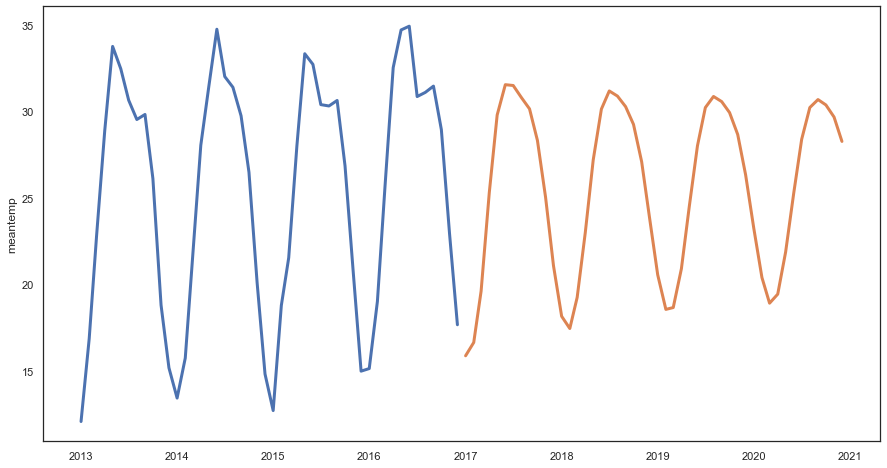

In [74]:
data = train_set_mean["meantemp"]
pred = four_years_pred["meantemp"]

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("white")

plot = sns.lineplot(x = data.index,    y = data, linewidth = 3)
plot = sns.lineplot(x = pred.index,    y = pred, linewidth = 3)

### 2.8.2 wind_speed

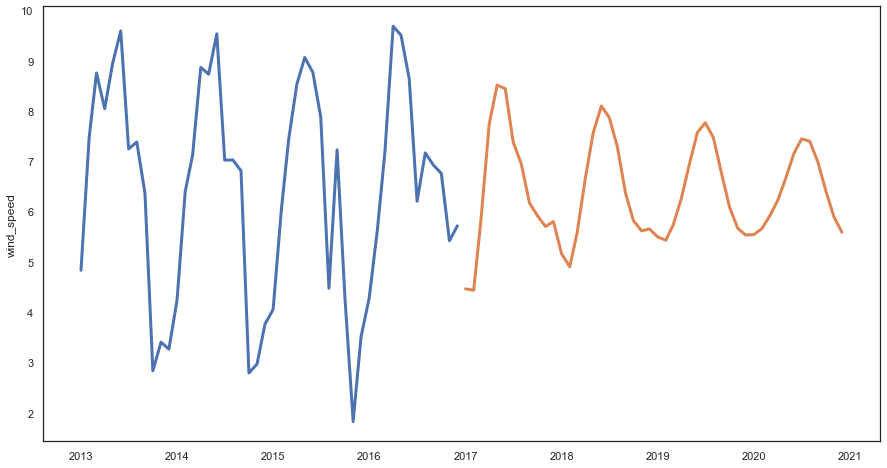

In [75]:
data = train_set_mean["wind_speed"]
pred = four_years_pred["wind_speed"]

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("white")

plot = sns.lineplot(x = data.index,    y = data, linewidth = 3)
plot = sns.lineplot(x = pred.index,    y = pred, linewidth = 3)

### 2.8.3 humidity

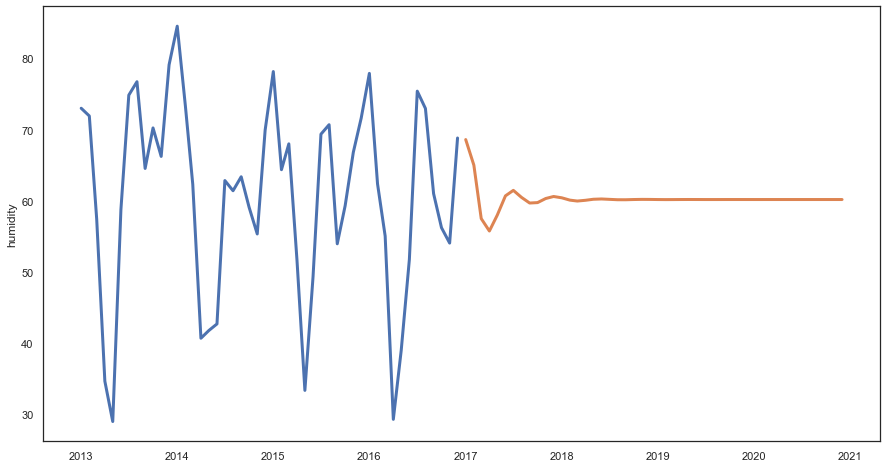

In [76]:
data = train_set_mean["humidity"]
pred = four_years_pred["humidity"]

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("white")

plot = sns.lineplot(x = data.index,    y = data, linewidth = 3)
plot = sns.lineplot(x = pred.index,    y = pred, linewidth = 3)

Як я вже зазначав, для передбачення цього значення потрібна потужніша модель.

### 2.8.4 meanpressure

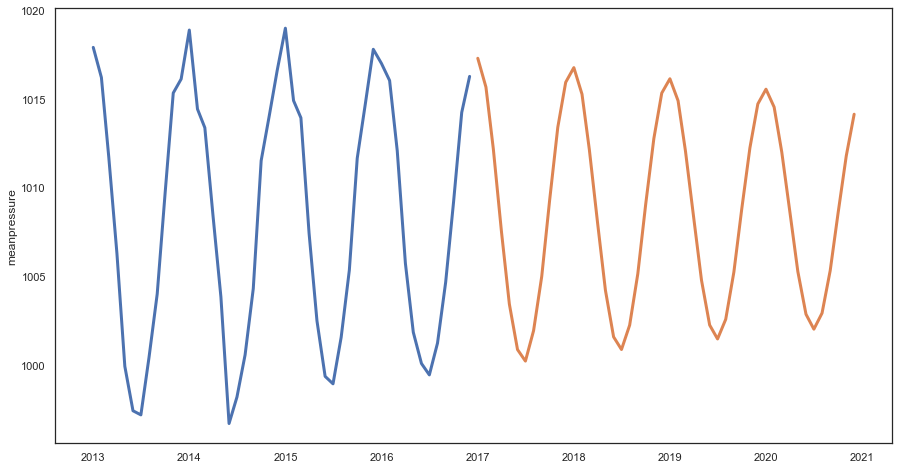

In [77]:
data = train_set_mean["meanpressure"]
pred = four_years_pred["meanpressure"]

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("white")

plot = sns.lineplot(x = data.index,    y = data, linewidth = 3)
plot = sns.lineplot(x = pred.index,    y = pred, linewidth = 3)

## Висновок

Під час виконання лабораторної роботи для двох датасетів було зроблено наступне: була проведена візуалізація даних, було розбито початкові дані на навчальний та валідаційний набори, за допомогою яких згодом було побудовано та оцінено регресіонні моделі на основі опорних векторів, згодом було проведено підбір параметрів за допомогою решітчатого пошуку, а також вибрано фінальну модель. В кінці деякі моделі були навчені на підмножинах навчальних даних, щоб оцінити наскiльки розмiр навчальної множини впливає на якiсть передбачень моделi.